<a href="https://colab.research.google.com/github/Kush-tech1/Electricity-Demand-Forecasting/blob/main/Electricity_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("michaelrlooney/electricity-load-diagrams-2011-2014")

print("Path to dataset files:", path)

100%|██████████| 251M/251M [00:02<00:00, 126MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/michaelrlooney/electricity-load-diagrams-2011-2014/versions/1


In [2]:
import pandas as pd
import os

file_path = os.path.join(path, "LD2011_2014.txt")
df = pd.read_csv(
    file_path,
    sep=";",          # IMPORTANT
    decimal=",")

In [3]:
df.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(140256, 371)

In [5]:
df.rename(columns={'Unnamed: 0': 'DateTime'}, inplace=True)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df['total_load'] = df.sum(axis=1)

In [9]:
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,total_load
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68513.115338
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69180.304361
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69364.850573
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68350.480660
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66166.874303


In [10]:
data = df[['total_load']].copy()
data.rename(columns={'total_load': 'load'}, inplace=True)

In [11]:
data.head()

,load
DateTime,
2011-01-01 00:15:00,68513.115338
2011-01-01 00:30:00,69180.304361
2011-01-01 00:45:00,69364.850573
2011-01-01 01:00:00,68350.480660
2011-01-01 01:15:00,66166.874303


In [12]:
data.shape

(140256, 1)

In [13]:
(data['load'] == 0).sum()

np.int64(0)

In [14]:
(data['load'] < 0).sum()

np.int64(0)

In [15]:
data.describe()

,load
count,140256.000000
mean,195556.942526
std,84259.360145
min,342.595509
25%,131128.411567
50%,167856.513526
75%,248834.303388
max,452652.595567


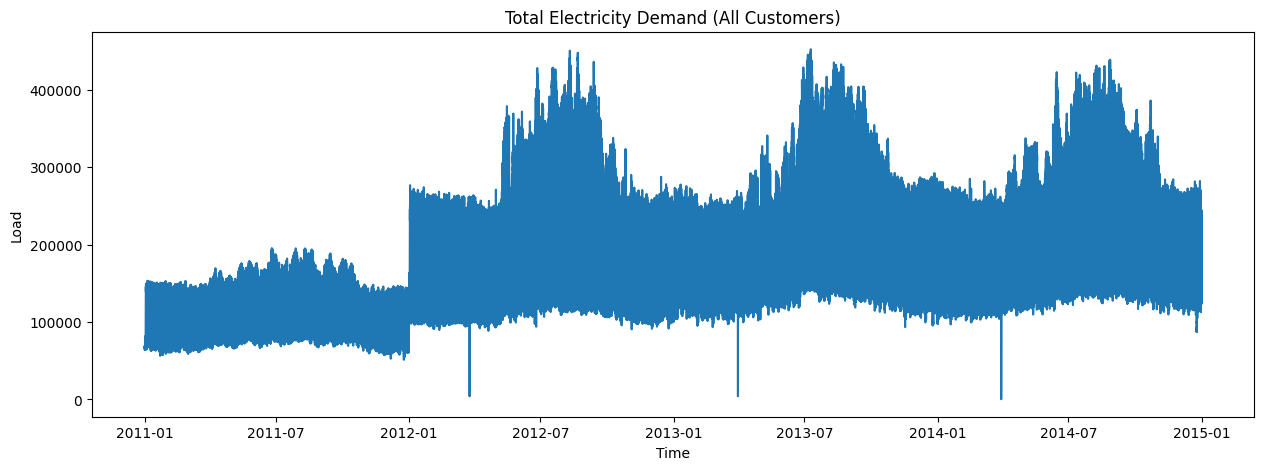

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(data.index, data['load'])
plt.title("Total Electricity Demand (All Customers)")
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()

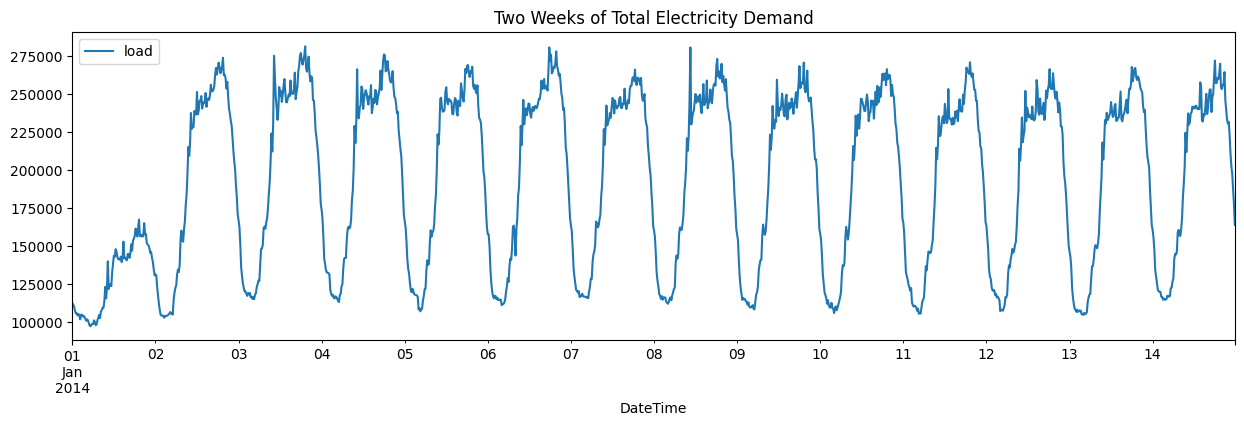

In [17]:
data.loc['2014-01-01':'2014-01-14'].plot(figsize=(15,4))
plt.title("Two Weeks of Total Electricity Demand")
plt.show()


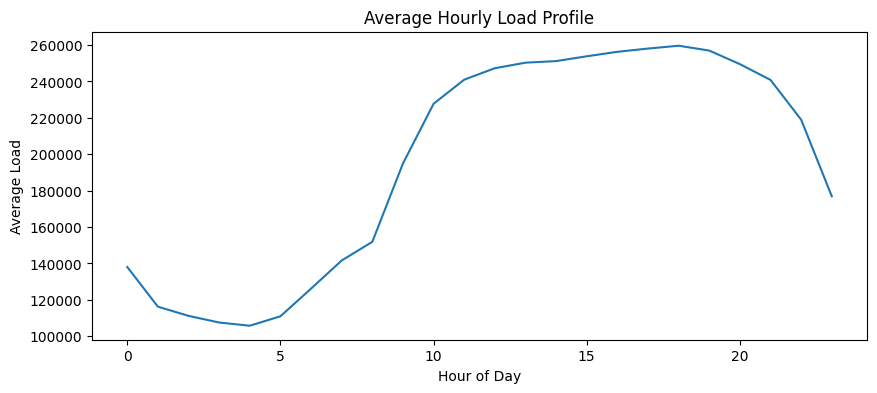

In [18]:
hourly_profile = data.groupby(data.index.hour)['load'].mean()

plt.figure(figsize=(10,4))
hourly_profile.plot()
plt.title("Average Hourly Load Profile")
plt.xlabel("Hour of Day")
plt.ylabel("Average Load")
plt.show()


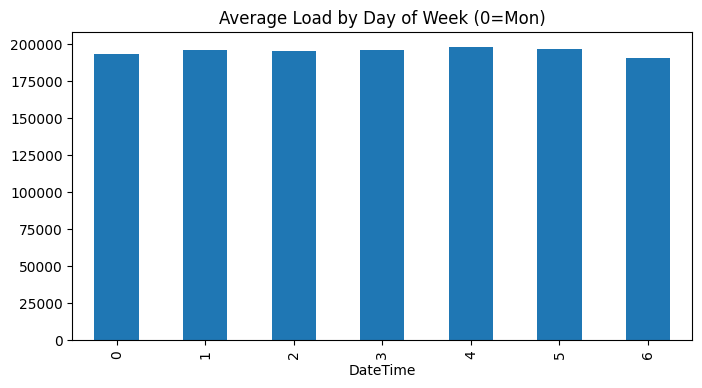

In [19]:
weekly_profile = data.groupby(data.index.dayofweek)['load'].mean()

plt.figure(figsize=(8,4))
weekly_profile.plot(kind='bar')
plt.title("Average Load by Day of Week (0=Mon)")
plt.show()

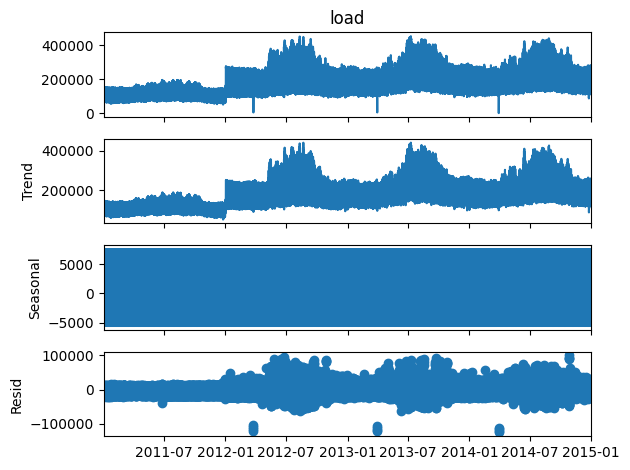

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(
    data['load'],
    model='additive',
    period=24
)

decomp.plot()
plt.show()

Step 5; feature engg

In [21]:
feat = data.copy()

In [22]:
feat['hour'] = feat.index.hour
feat['dayofweek'] = feat.index.dayofweek   # 0=Mon, 6=Sun
feat['month'] = feat.index.month
feat['is_weekend'] = feat['dayofweek'].isin([5, 6]).astype(int)

In [23]:
feat['lag_1'] = feat['load'].shift(1)       # previous hour
feat['lag_24'] = feat['load'].shift(24)     # same hour yesterday
feat['lag_168'] = feat['load'].shift(168)   # same hour last week

In [24]:
feat['rolling_mean_24'] = feat['load'].rolling(24).mean()
feat['rolling_std_24'] = feat['load'].rolling(24).std()

feat['rolling_mean_168'] = feat['load'].rolling(168).mean()


In [25]:
feat.head()

,load,hour,dayofweek,month,is_weekend,lag_1,lag_24,lag_168,rolling_mean_24,rolling_std_24,rolling_mean_168
DateTime,,,,,,,,,,,
2011-01-01 00:15:00,68513.115338,0,5,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:30:00,69180.304361,0,5,1,1,68513.115338,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:45:00,69364.850573,0,5,1,1,69180.304361,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,68350.480660,1,5,1,1,69364.850573,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:15:00,66166.874303,1,5,1,1,68350.480660,NaN,NaN,NaN,NaN,NaN


In [26]:
feat.dropna(inplace=True)

In [27]:
feat.head()

,load,hour,dayofweek,month,is_weekend,lag_1,lag_24,lag_168,rolling_mean_24,rolling_std_24,rolling_mean_168
DateTime,,,,,,,,,,,
2011-01-02 18:15:00,145130.896613,18,6,1,1,148990.492095,145937.430924,68513.115338,141828.265350,2432.382804,89808.016588
2011-01-02 18:30:00,147565.583074,18,6,1,1,145130.896613,145761.639730,69180.304361,141903.429656,2582.457280,90274.595628
2011-01-02 18:45:00,147310.064510,18,6,1,1,147565.583074,142686.547243,69364.850573,142096.076209,2806.178676,90738.555235
2011-01-02 19:00:00,146015.088704,19,6,1,1,147310.064510,140517.398524,68350.480660,142325.146633,2894.701074,91200.844568
2011-01-02 19:15:00,143148.001541,19,6,1,1,146015.088704,140266.015798,66166.874303,142445.229372,2865.194148,91659.065564


In [28]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140088 entries, 2011-01-02 18:15:00 to 2015-01-01 00:00:00
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   load              140088 non-null  float64
 1   hour              140088 non-null  int32  
 2   dayofweek         140088 non-null  int32  
 3   month             140088 non-null  int32  
 4   is_weekend        140088 non-null  int64  
 5   lag_1             140088 non-null  float64
 6   lag_24            140088 non-null  float64
 7   lag_168           140088 non-null  float64
 8   rolling_mean_24   140088 non-null  float64
 9   rolling_std_24    140088 non-null  float64
 10  rolling_mean_168  140088 non-null  float64
dtypes: float64(7), int32(3), int64(1)
memory usage: 11.2 MB


step 6 : train test split

In [29]:
train = feat.loc[:'2014-06-30']
test  = feat.loc['2014-07-01':]


In [30]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2011-01-02 18:15:00 2014-06-30 23:45:00
2014-07-01 00:00:00 2015-01-01 00:00:00


In [31]:
X_train = train.drop(columns='load')
y_train = train['load']

X_test  = test.drop(columns='load')
y_test  = test['load']


In [32]:
X_train.shape, X_test.shape

((122423, 10), (17665, 10))

In [33]:
train.index.max() < test.index.min()

True

Baseline

In [34]:
baseline_preds = X_test['lag_24']

In [35]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [36]:
xgb_preds = model.predict(X_test)

eval

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [38]:
baseline_mae = mean_absolute_error(y_test, baseline_preds)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print("Baseline MAE :", baseline_mae)
print("Baseline RMSE:", baseline_rmse)

Baseline MAE : 94123.06575171476
Baseline RMSE: 118049.83131159272


In [39]:
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print("XGBoost MAE :", xgb_mae)
print("XGBoost RMSE:", xgb_rmse)

XGBoost MAE : 4293.836905072827
XGBoost RMSE: 6663.400514433905


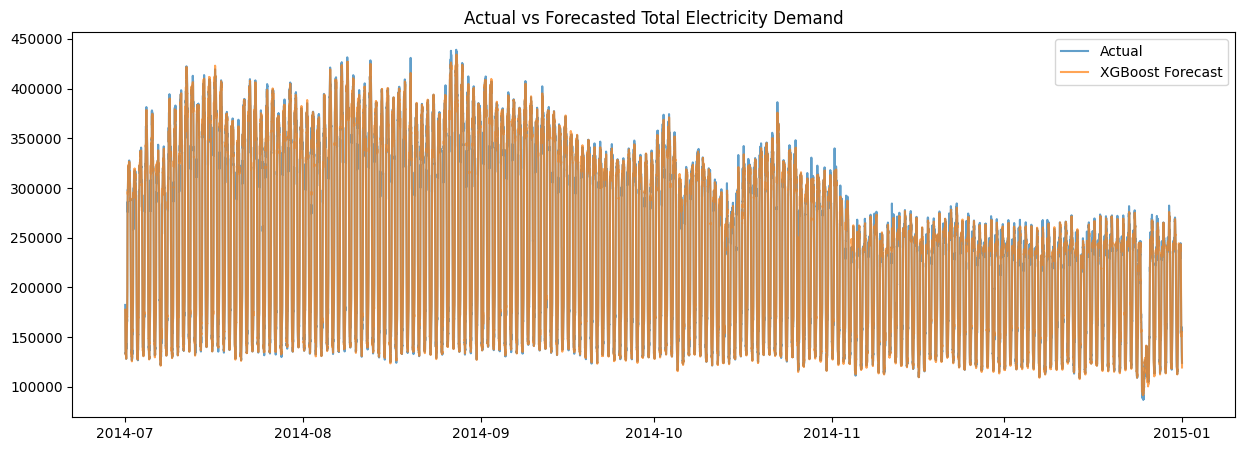

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
plt.plot(y_test.index, xgb_preds, label='XGBoost Forecast', alpha=0.7)
plt.legend()
plt.title("Actual vs Forecasted Total Electricity Demand")
plt.show()

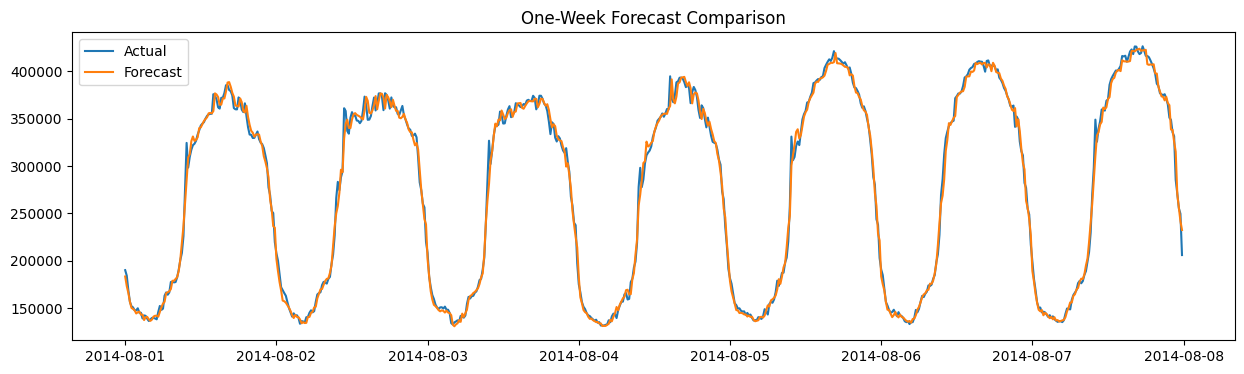

In [41]:
zoom = slice('2014-08-01', '2014-08-07')

plt.figure(figsize=(15,4))
# Get the actual 'y_test' data for the zoomed period
y_test_zoomed = y_test.loc[zoom]

# Plot actual data
plt.plot(y_test_zoomed.index, y_test_zoomed, label='Actual')

# Determine the integer start and end indices for xgb_preds corresponding to y_test_zoomed
start_idx_in_y_test = y_test.index.get_loc(y_test_zoomed.index[0])
end_idx_in_y_test = y_test.index.get_loc(y_test_zoomed.index[-1]) + 1 # +1 for exclusive end of slice

# Slice xgb_preds using these integer indices
xgb_preds_zoomed = xgb_preds[start_idx_in_y_test : end_idx_in_y_test]

# Plot forecasted data
plt.plot(y_test_zoomed.index, xgb_preds_zoomed,
         label='Forecast')
plt.legend()
plt.title("One-Week Forecast Comparison")
plt.show()